In [18]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [3]:
bank = pd.read_csv(r"C:\Users\natal\Downloads\bank+marketing\bank\bank-full.csv", sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
null_values = bank.isnull().sum()
print(null_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [8]:
label_encoders = {}
for column in bank.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    bank[column] = le.fit_transform(bank[column])
    label_encoders[column] = le

In [9]:
X = bank.drop(columns=['y'])
y = bank['y']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

missing_values, X_train.shape, X_test.shape, y_train.shape, y_test.shape

(age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 y            0
 dtype: int64,
 (36168, 16),
 (9043, 16),
 (36168,),
 (9043,))

In [11]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
y_pred = dtc.predict(X_test)


In [15]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.8740462235983634
Confusion Matrix:
[[7378  574]
 [ 565  526]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



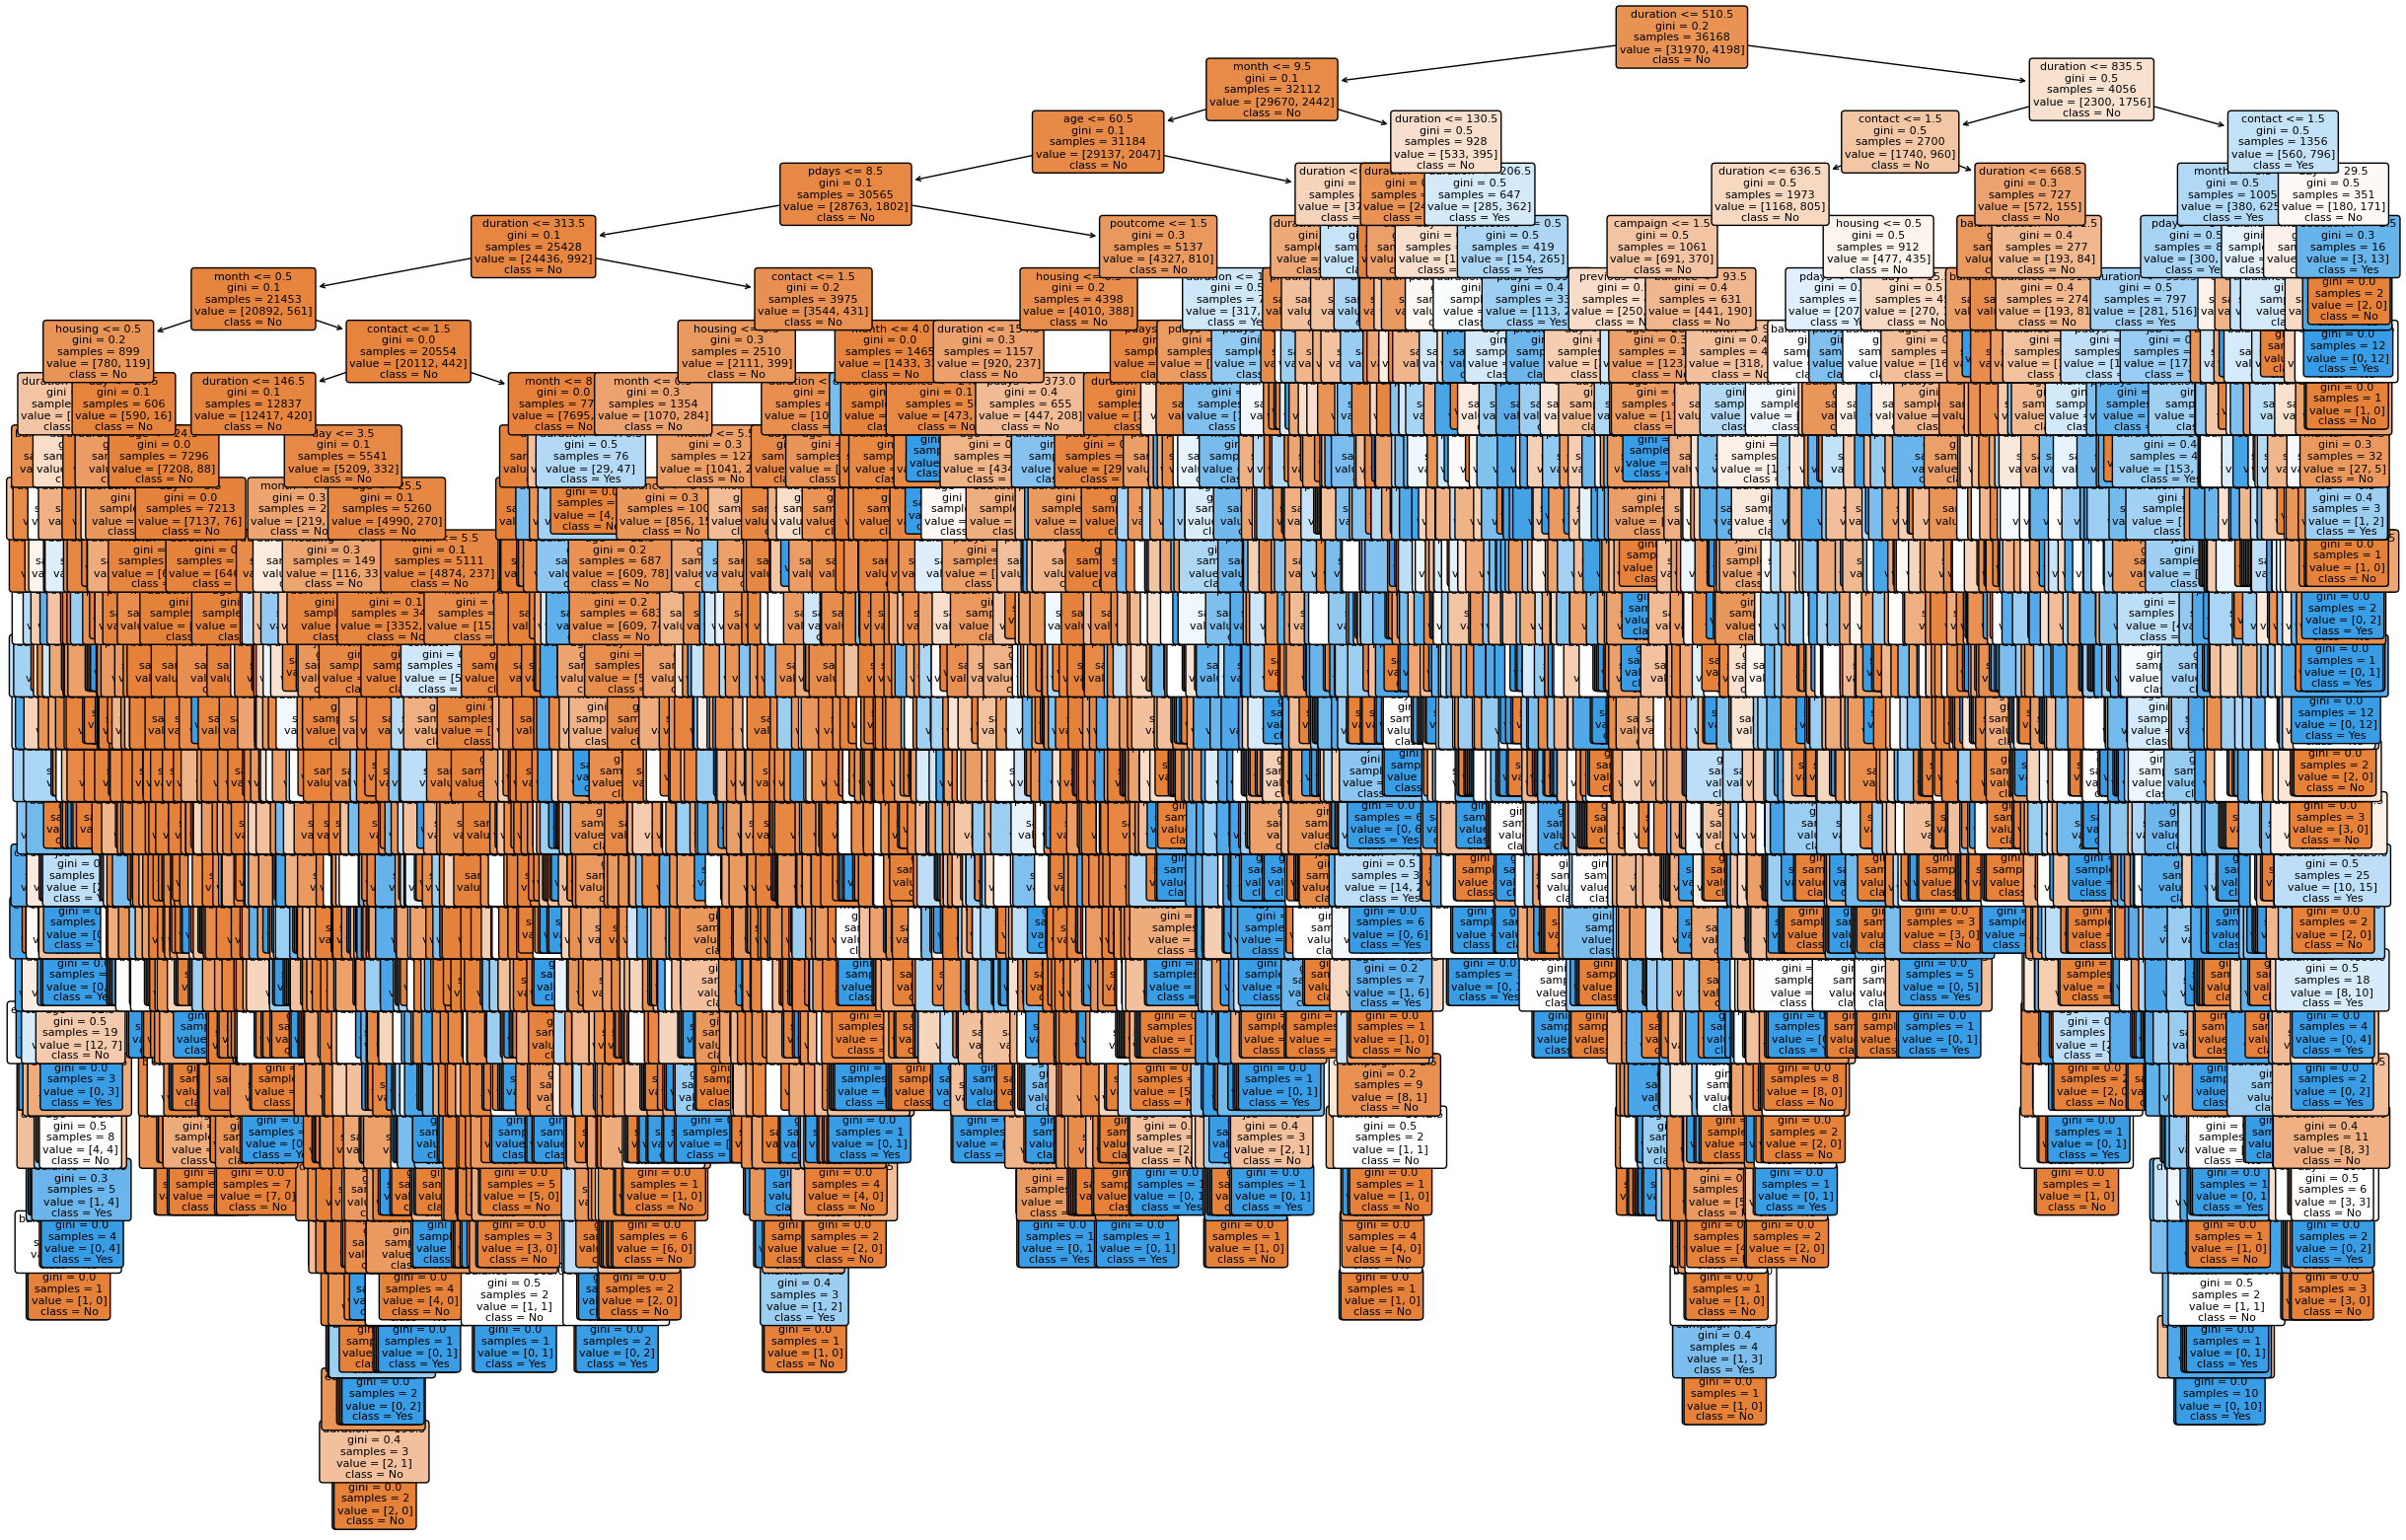

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 20)) 
plot_tree(dtc, 
          filled=True,
          feature_names=X.columns, 
          class_names=['No', 'Yes'], 
          rounded=True, 
          proportion=False,  
          precision=1,  
          fontsize=8,  
          )  
plt.show()


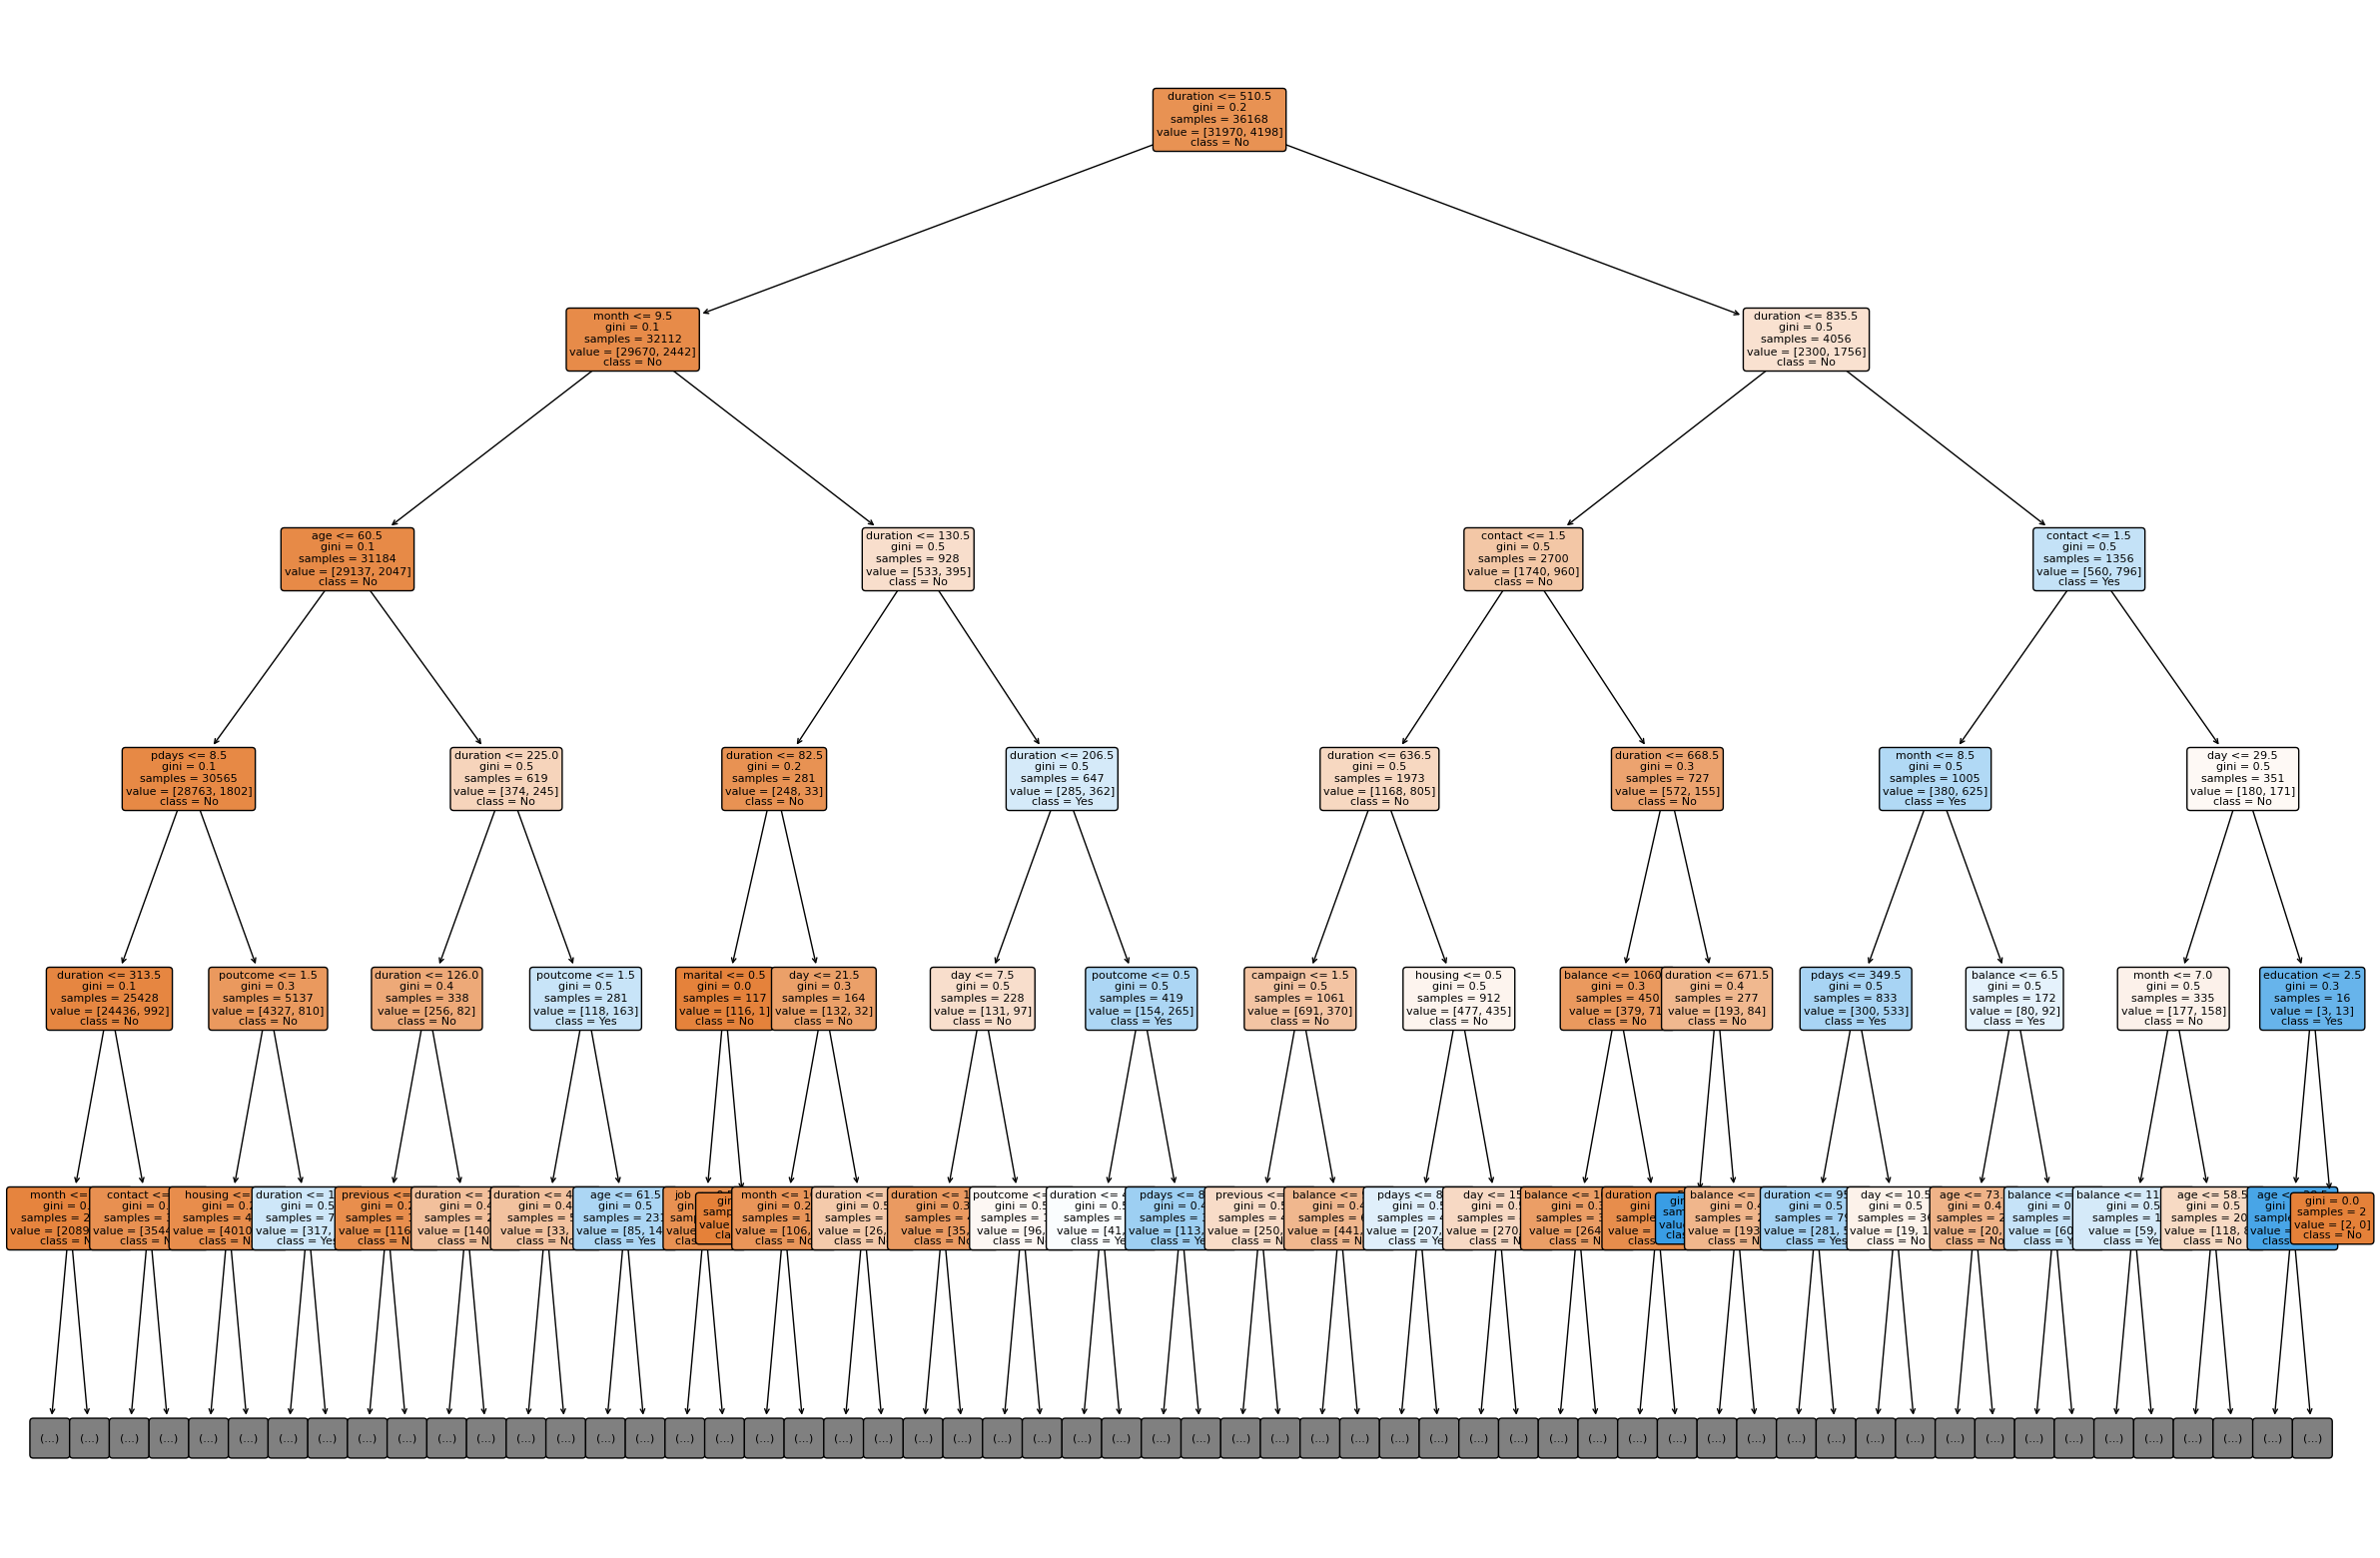

In [26]:
#To increase readability limit the depth of the tree
plt.figure(figsize=(30, 20))  
plot_tree(dtc, 
          max_depth=5,  
          filled=True,
          feature_names=X.columns, 
          class_names=['No', 'Yes'], 
          rounded=True, 
          proportion=False,  
          precision=1,  
          fontsize=8,  
          )  
plt.show()
